### Import Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import random

### Import Data

In [2]:
npids = -1
data = pd.read_csv('nlst_subsets.csv').sample(frac=1)
data_canc = data[data['can_scr']>0][:-1]
data_no_canc = data[data['can_scr']==0][:][:len(data_canc)*4]
data = pd.concat([data_canc, data_no_canc])

data['cancer']      = data['can_scr'].where(data['can_scr']<=0,2)-1
data['cancyr']      = (data['cancyr']+1).fillna(0).astype(int)
data['start_smoke'] = data['smokeage'].fillna(0).astype(int)
data['quit_smoke']  = data['age_quit'].fillna(data['age']+data['cancyr']).astype(int)
data['mag_smoke']   = data['smokeday']
data['smokeyr']     = data['quit_smoke']-data['start_smoke']

###  Sort one variable

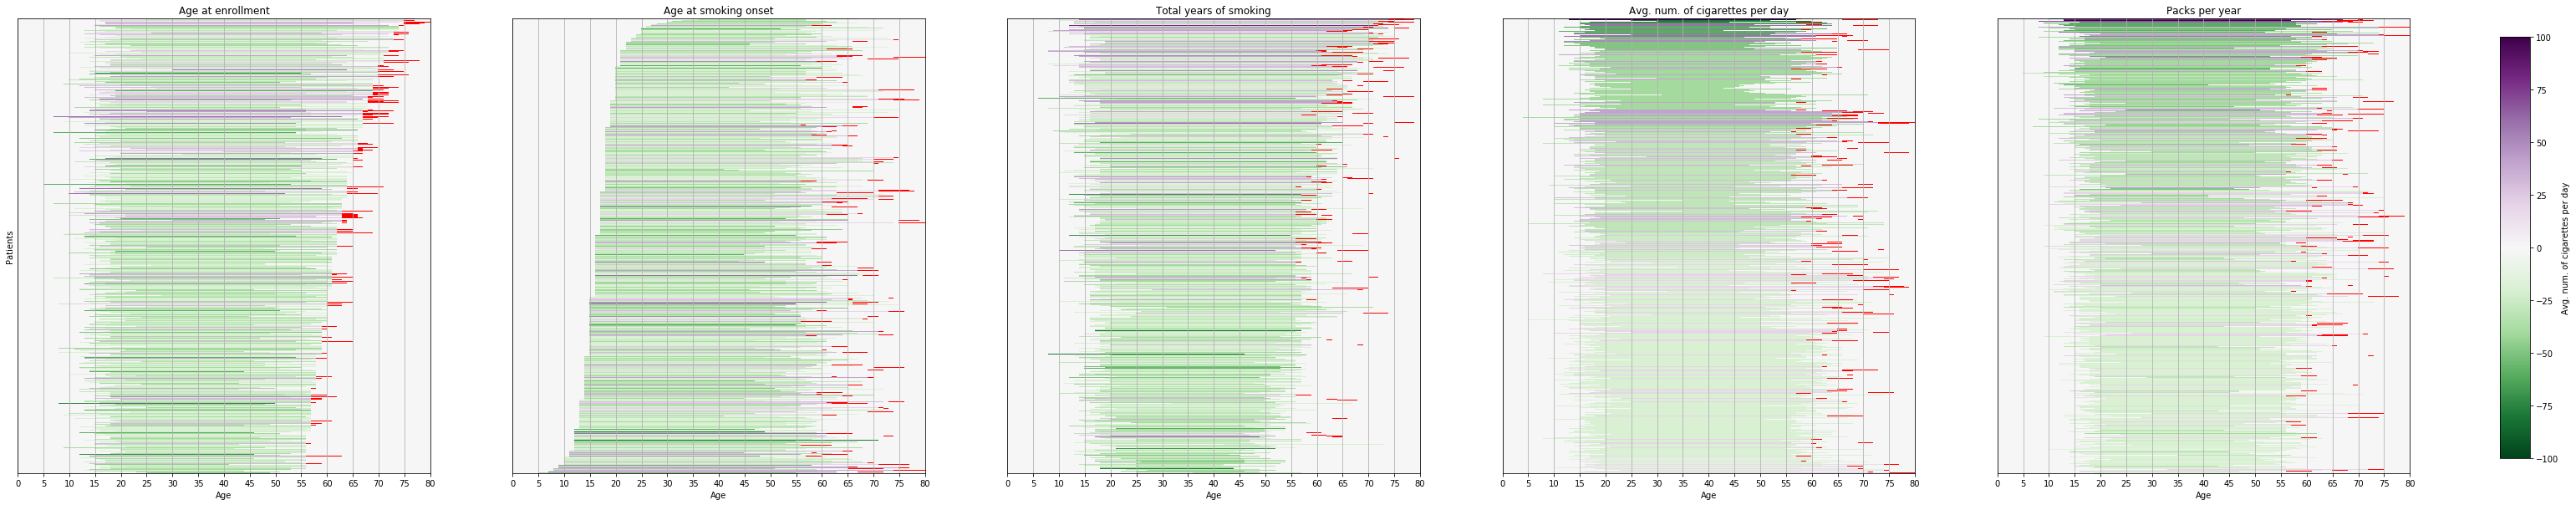

In [4]:
variables = ['age', 'smokeage', 'smokeyr', 'mag_smoke', 'pkyr']
titles    = ['Age at enrollment', 'Age at smoking onset', 'Total years of smoking', 
             'Avg. num. of cigarettes per day', 'Packs per year']
fig, axes = plt.subplots(1, len(variables), figsize=(10*len(variables),10))
cmap = cm.PRGn_r
cmap.set_bad('r',1.)
for i, (var, tit) in enumerate(zip(variables, titles)):
    
    # Sort data
    data = data.sort_values(var)
    
    # Extract data
    age    = data['age']
    cancer = data['cancer']
    cancyr = data['cancyr']
    
    # Define axis
    x = np.arange(age.max()+7)
    y = np.arange(len(data))
    
    # Create array
    start_smoke = data['start_smoke']
    quit_smoke  = data['quit_smoke']
    mag_smoke   = data['mag_smoke']

    smoke = np.zeros((len(y), len(x)))
    for pid in range(len(data)):
        smoke[pid, start_smoke.values[pid]:quit_smoke.values[pid]+1] = mag_smoke.values[pid]*cancer.values[pid]
        smoke[pid, age.values[pid]+1:age.values[pid]+cancyr.values[pid]+1] = np.nan
    
    # Plot
    ax = axes[i]
    
    pcol = ax.pcolormesh(x, y, smoke, 
                         cmap=cmap, vmin=-data['mag_smoke'].max(), 
                         vmax=data['mag_smoke'].max())

    ax.set_xticks(x[::5])
    ax.set_yticks([])
    ax.set_title(tit)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    if i==0:
        ax.set_ylabel('Patients')
    ax.set_xlabel('Age')    
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcol, cax=cbar_ax, label='Avg. num. of cigarettes per day')
fig.savefig('smoking_sorting_one.png')

### Sort multiple variables

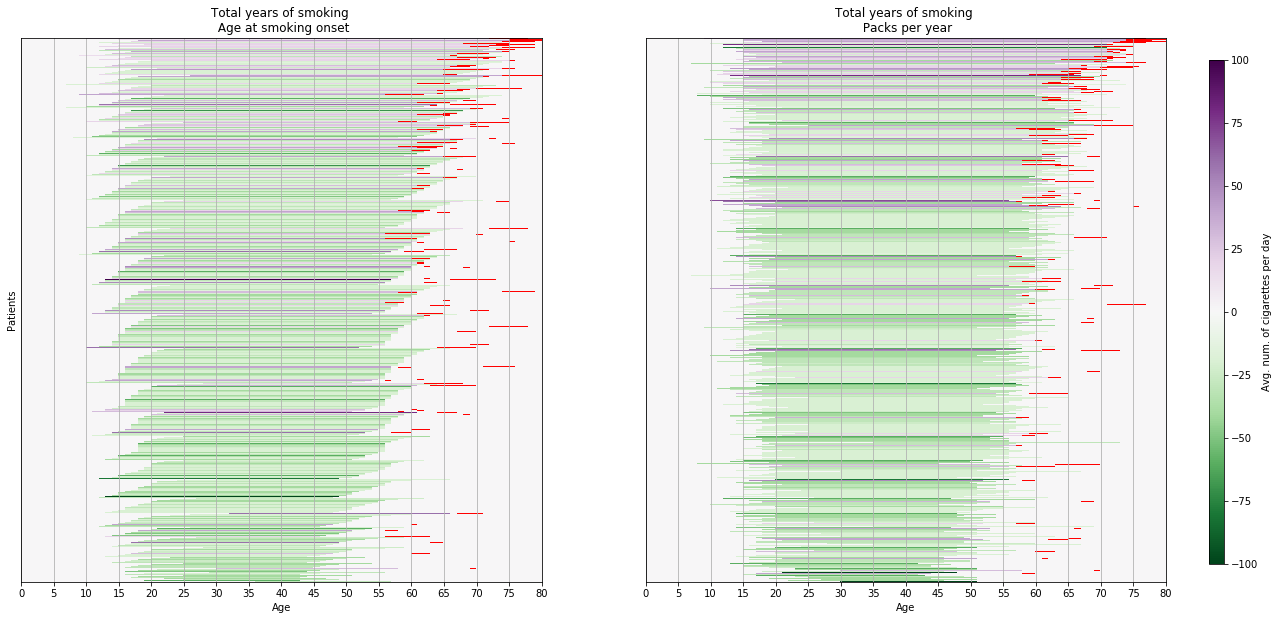

In [5]:
variables = [['smokeyr', 'smokeage'], ['smokeyr', 'pkyr']]
titles    = ['Total years of smoking \n Age at smoking onset',
             'Total years of smoking \n Packs per year']

fig, axes = plt.subplots(1, len(variables), figsize=(10*len(variables),10))
cmap = cm.PRGn_r
cmap.set_bad('r',1.)
for i, (var, tit) in enumerate(zip(variables, titles)):
    
    # Sort data
    data = data.sort_values(var)
    
    # Extract data
    age    = data['age']
    cancer = data['cancer']
    cancyr = data['cancyr']
    
    # Define axis
    x = np.arange(age.max()+7)
    y = np.arange(len(data))
    
    # Create array
    start_smoke = data['start_smoke']
    quit_smoke  = data['quit_smoke']
    mag_smoke   = data['mag_smoke']

    smoke = np.zeros((len(y), len(x)))
    for pid in range(len(data)):
        smoke[pid, start_smoke.values[pid]:quit_smoke.values[pid]+1] = mag_smoke.values[pid]*cancer.values[pid]
        smoke[pid, age.values[pid]+1:age.values[pid]+cancyr.values[pid]+1] = np.nan
    
    # Plot
    ax = axes[i]
    
    pcol = ax.pcolormesh(x, y, smoke, 
                         cmap=cmap, vmin=-data['mag_smoke'].max(), 
                         vmax=data['mag_smoke'].max())

    ax.set_xticks(x[::5])
    ax.set_yticks([])
    ax.set_title(tit)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    if i==0:
        ax.set_ylabel('Patients')
    ax.set_xlabel('Age')    
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.95, 0.15, 0.01, 0.7])
cbar = fig.colorbar(pcol, cax=cbar_ax, label='Avg. num. of cigarettes per day')
fig.savefig('smoking_sorting_mult.png')